#**Project:Segmentation Analysis of Countries on Life Expectancy,GDP, and Population**
Bikash Ghimirey

#**Importing Environment**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#**Loading and Preparing data**

In [ ]:
#loading data
url = 'https://raw.githubusercontent.com/siglimumuni/Datasets/refs/heads/master/UN_Life_Exp_vs_GDP_per_Capita_2023%20-%20UN_Life_Exp_vs_GDP_per_Capita_2023_2%20-%20UN_Life_Exp_vs_GDP_per_Capita_2023%20-%20UN_Life_Exp_vs_GDP_per_Capita_2023_2.csv'

In [ ]:
#creating dataframe
cluster_df = pd.read_csv(url)

In [ ]:
# Detail info of data
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          165 non-null    object
 1   Life Expectancy  165 non-null    int64 
 2   GDP per Capita   165 non-null    int64 
 3   Population       165 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.3+ KB


In [ ]:
#viewing first 10 row
cluster_df.head(10)

,Country,Life Expectancy,GDP per Capita,Population
0,Afghanistan,66,1358,40578846
1,Albania,79,12978,2827615
2,Algeria,76,13506,45477391
3,Angola,64,6119,35635028
4,Argentina,76,18292,45407904
5,Armenia,75,13838,2880883
6,Australia,83,52049,26200987
7,Austria,81,43793,9064679
8,Azerbaijan,74,17683,10295307
9,Bahrain,81,38652,1533459


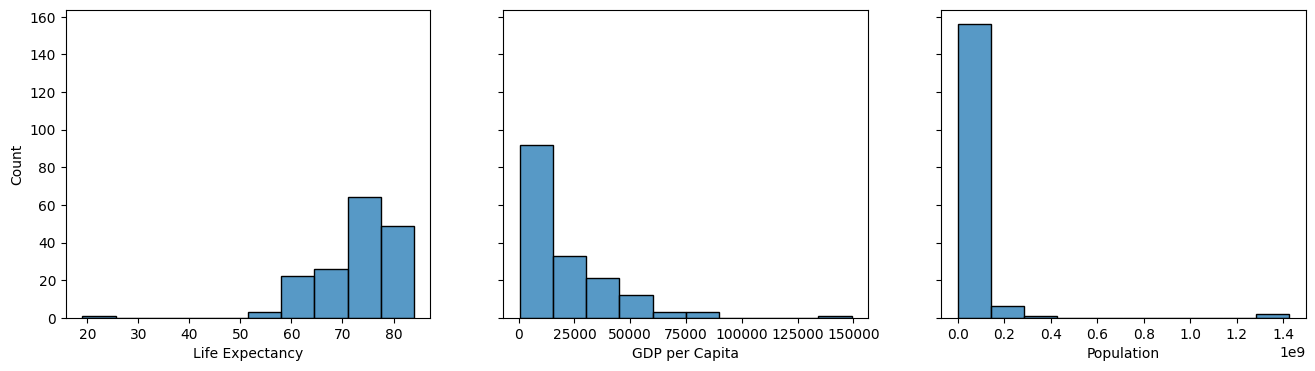

In [ ]:
# viewing distribution of data
fig , axes = plt.subplots(nrows=1, ncols=3, figsize=(16,4), sharey = True)

#ploting histogram of Life Expectancy  GDP per Capita  Population
for i, col in enumerate(["Life Expectancy",  "GDP per Capita",  "Population"]):
  sns.histplot(cluster_df[col], bins=10, ax=axes[i])

<Axes: >

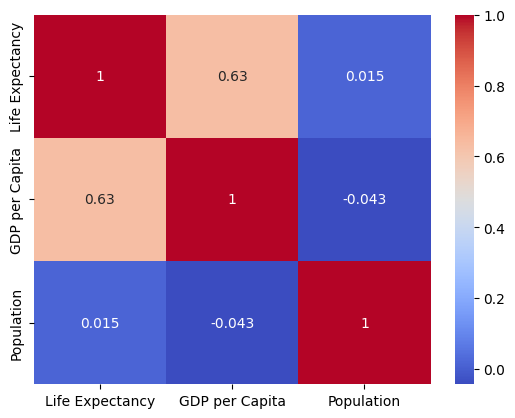

In [ ]:
#Checking Correlation between the different variables
cor_matrix = cluster_df[["Life Expectancy",  "GDP per Capita",  "Population"]].corr()
sns.heatmap(cor_matrix,cmap="coolwarm", annot=True)

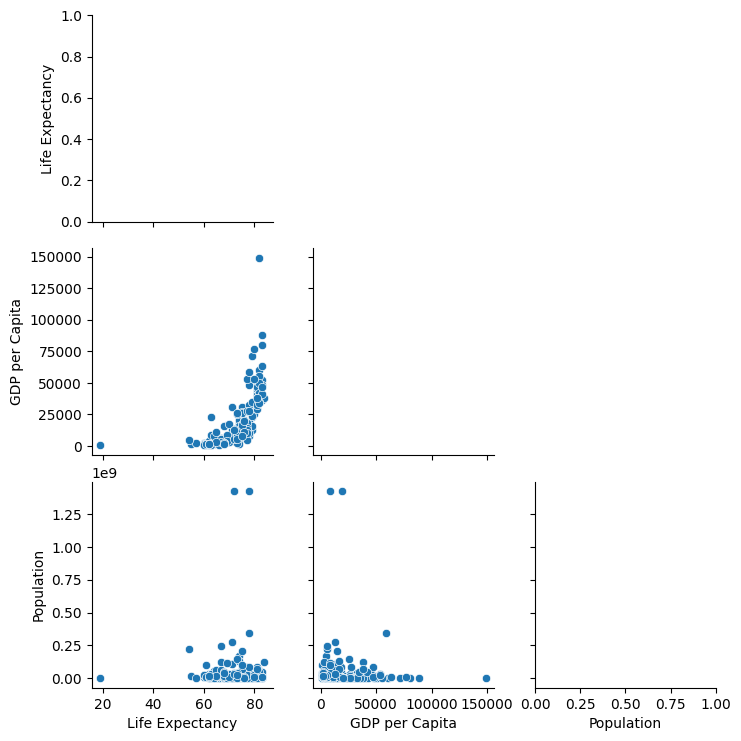

In [ ]:
# Viewing scatter subplot between Life Expectancy  GDP per Capita  Population
sns.pairplot(cluster_df, vars=["Life Expectancy", "GDP per Capita", "Population"], diag_kind='none', corner=True);


In [ ]:
# GDP and Population is varying widely so apply log transformation to reduce skewness.
cluster_df["GDP per Capita"] = np.log(cluster_df["GDP per Capita"])
cluster_df["Population"] = np.log(cluster_df["Population"])

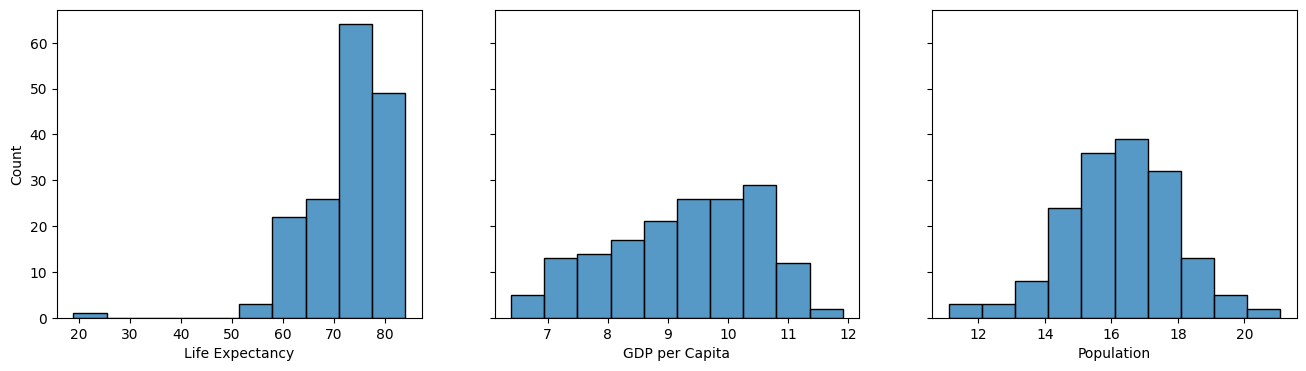

In [ ]:
# viewing distribution of data again after log tranform
fig , axes = plt.subplots(nrows=1, ncols=3, figsize=(16,4), sharey = True)

#ploting histogram of Life Expectancy  GDP per Capita  Population
for i, col in enumerate(["Life Expectancy",  "GDP per Capita",  "Population"]):
  sns.histplot(cluster_df[col], bins=10, ax=axes[i])

In [ ]:
# data after log transform
cluster_df.head()

,Country,Life Expectancy,GDP per Capita,Population
0,Afghanistan,66,7.213768,17.518757
1,Albania,79,9.471011,14.854944
2,Algeria,76,9.510889,17.632726
3,Angola,64,8.719154,17.388840
4,Argentina,76,9.814219,17.631197


<Axes: >

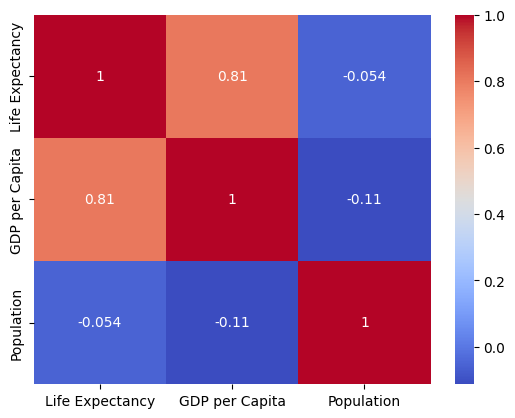

In [ ]:
#Checking Correlation between the different variables after transform
cor_matrix = cluster_df[["Life Expectancy",  "GDP per Capita",  "Population"]].corr()
sns.heatmap(cor_matrix,cmap="coolwarm", annot=True)

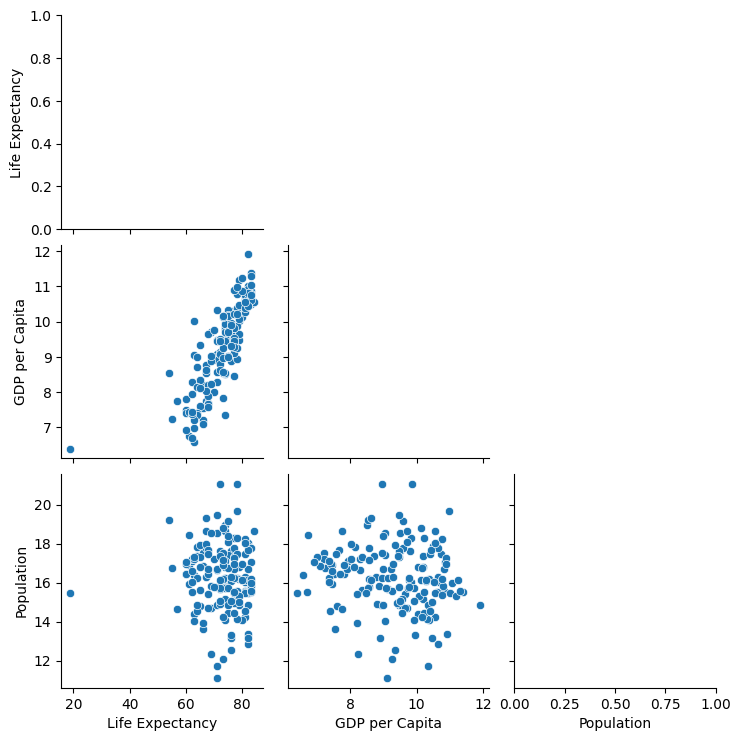

In [ ]:
# Viewing scatter subplot between Life Expectancy  GDP per Capita  Population after transformation
sns.pairplot(cluster_df, vars=["Life Expectancy", "GDP per Capita", "Population"], diag_kind='none', corner=True);

In [ ]:
# creating subsets
X = cluster_df[["Life Expectancy",  "GDP per Capita",  "Population"]]

In [ ]:
#Normalizing the data
X_scaled = StandardScaler().fit_transform(X)

#**KMeans cluster implementation**

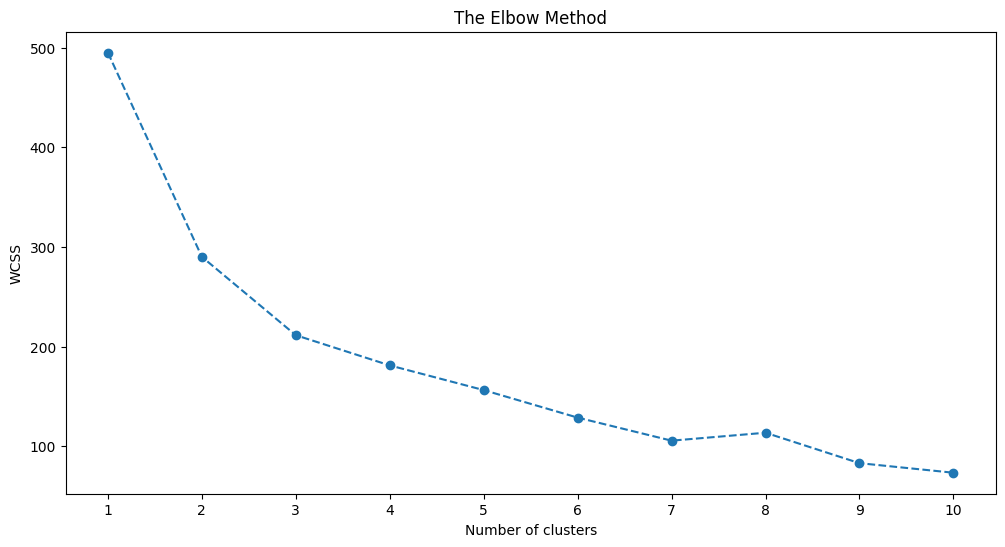

In [ ]:
#Determine the variation in the data
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

#Plot the elbow curve
plt.figure(figsize = (12,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.title('The Elbow Method')
plt.show()

In [ ]:
#model bulding with 6 number of clusters as shown by elbow method
kmean_model = KMeans(n_clusters=6, random_state=101)
kmean_model.fit(X_scaled)

KMeans(n_clusters=6, random_state=101)

In [ ]:
#segementing the input data by assigning labels
y = kmean_model.predict(X_scaled)

In [ ]:
#Creating a new column
cluster_df["Label"] = y

#view after label assigned
cluster_df.head(7)

,Country,Life Expectancy,GDP per Capita,Population,Label
0,Afghanistan,66,7.213768,17.518757,0
1,Albania,79,9.471011,14.854944,1
2,Algeria,76,9.510889,17.632726,2
3,Angola,64,8.719154,17.388840,0
4,Argentina,76,9.814219,17.631197,2
5,Armenia,75,9.535174,14.873607,5
6,Australia,83,10.859941,17.081308,3


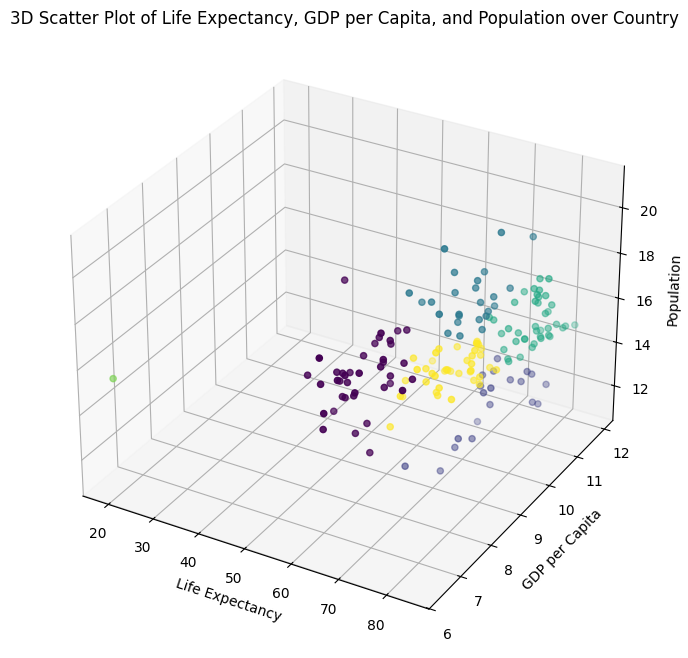

In [ ]:
#making 3D scatter plot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster_df["Life Expectancy"], cluster_df["GDP per Capita"], cluster_df["Population"], c=cluster_df["Label"])
ax.set_xlabel("Life Expectancy")
ax.set_ylabel("GDP per Capita")
ax.set_zlabel("Population")
plt.title("3D Scatter Plot of Life Expectancy, GDP per Capita, and Population over Country")
plt.show()

#**Segmentation**

In [ ]:
#Segment this cluster with count of each cluster and list of country

segmentation = cluster_df.groupby('Label').agg(
    country_count=('Country', 'size'),
    countries=('Country', lambda x: list(x))
).reset_index().rename(columns={'Label': 'Segment'})

segmentation_sorted = segmentation.sort_values(by='country_count', ascending=False).reset_index(drop=True)

#Giving descriptive name to segments according to descending order of sorting
segmentation_sorted['Segment'] = segmentation_sorted['Segment'].replace({3: 'Segment_Alpha_A',
                                                                          5: 'Segment_Alpha_B',
                                                                           0: 'Segment_Beta',
                                                                           2: 'Segment_Gamma',
                                                                           1: 'Segment_Delta',
                                                                           4: 'Segment_Epsilon'})

segmentation_sorted




,Segment,country_count,countries
0,Segment_Alpha_A,40,"[Australia, Austria, Belgium, Canada, Chile, C..."
1,Segment_Alpha_B,40,"[Armenia, Azerbaijan, Belarus, Bolivia, Bosnia..."
2,Segment_Beta,39,"[Afghanistan, Angola, Benin, Burkina Faso, Bur..."
3,Segment_Gamma,25,"[Algeria, Argentina, Bangladesh, Brazil, China..."
4,Segment_Delta,20,"[Albania, Bahrain, Barbados, Cape Verde, Cypru..."
5,Segment_Epsilon,1,[Central African Republic]
